<a href="https://colab.research.google.com/github/MarAmorosMtz/SamsungInnovationCampus/blob/main/ModeloRNNwithKeras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
import matplotlib.pyplot as plt

In [9]:
df = pd.read_csv('data_boston.csv',header='infer',encoding='latin1')
df = df[['PRICE']]

In [10]:
scaler = MinMaxScaler()
ts_scaled = scaler.fit_transform(df)
ts_scaled_2 = ts_scaled.reshape(1, -1, 1)

In [11]:
batch_size = 1
n_epochs = 1000
learn_rate = 0.0001

In [15]:
model = tf.keras.Sequential([
    tf.keras.layers.LSTM(50, activation='relu', return_sequences=True, input_shape=(None, 1)),
    tf.keras.layers.LSTM(50, activation='relu', return_sequences=False),
    tf.keras.layers.Dense(25),
    tf.keras.layers.Dense(1)
])
#model.add(tf.keras.Input(shape=(None, 1)))

In [18]:
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i + seq_length])
        y.append(data[i + seq_length])
    return np.array(X), np.array(y)

In [19]:
seq_length = 10  # Número de pasos hacia atrás que usará la RNN
X, y = create_sequences(ts_scaled, seq_length)

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

In [16]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learn_rate), loss='mse')

In [21]:
history = model.fit(X_train, y_train, epochs=n_epochs, batch_size=batch_size, validation_data=(X_test, y_test))

Epoch 1/1000
396/396 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - loss: 0.1069 - val_loss: 0.0188
Epoch 2/1000
396/396 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0312 - val_loss: 0.0181
Epoch 3/1000
396/396 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.0307 - val_loss: 0.0133
Epoch 4/1000
396/396 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.0284 - val_loss: 0.0169
Epoch 5/1000
396/396 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.0277 - val_loss: 0.0139
Epoch 6/1000
396/396 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0264 - val_loss: 0.0158
Epoch 7/1000
396/396 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0257 - val_loss: 0.0142
Epoch 8/1000
396/396 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0284 - val_loss: 0.0140
Epoch 9/1000
396/396 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.0232 - val_loss: 0.0147
Epoch 10/1000
396/396 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0276 - val_loss: 0.0146
Epoch 11/1000
396/396 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0233 - val_loss: 0.0152
Epoch 12/1000
396/396 ━━━━━━━━

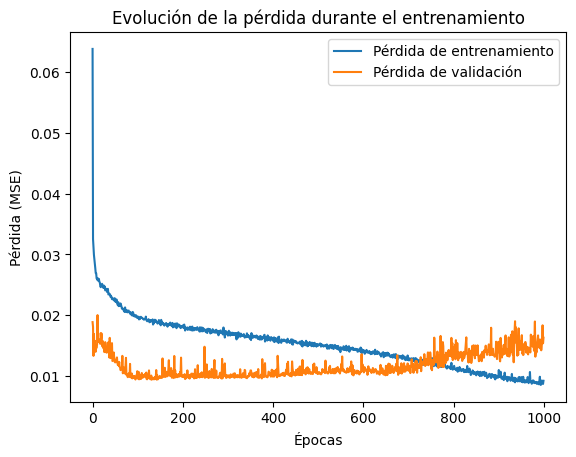

In [22]:
plt.plot(history.history['loss'], label='Pérdida de entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida de validación')
plt.xlabel('Épocas')
plt.ylabel('Pérdida (MSE)')
plt.legend()
plt.title('Evolución de la pérdida durante el entrenamiento')
plt.show()